<a href="https://colab.research.google.com/github/vomicienta/DataScience/blob/main/ProyectoDS_Partell_Cignola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Investigación de Exoplanetas - Telescopio Espacial Kepler
Kepler es un observatorio que buscaba planetas extrasolares, de tamaño similar a la Tierra que se encuentran en la zona de habitabilidad de su estrella (Exoplanetas Habitables), llevando a cabo lo que se conoce como **misión Kepler**. Lanzado por la NASA el 6 de marzo de 2009. El 15 de agosto de 2013 se dio por finalizada la misión principal y en noviembre de 2013 el inicio de la misión extendida K2. El 30 de octubre de 2018, tras nueve años de operación, la NASA anunció su retiro.

El nombre es una dedicatoria al astrónomo y matemático Johannes Kepler (1571-1630), descubridor de las tres leyes que describen las características de las órbitas planetarias.

De Wikipedia

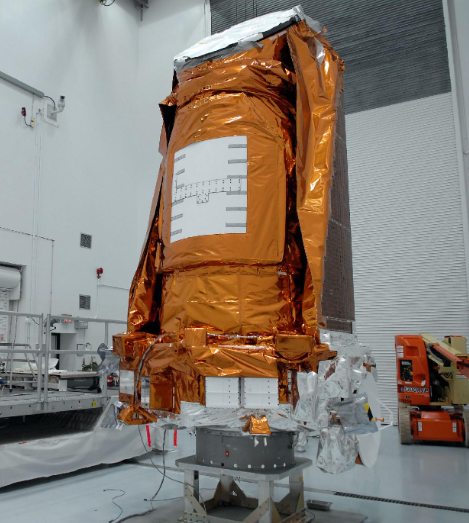

# Abstract:

La investigación de exoplanetas representa uno de los avances más significativos de la astrofísica y en la exploración espacial. Este campo de estudio no solo amplía nuestro conocimiento del universo, sino que también alimenta la esperanza de encontrar otros mundos habitables, lo que podría ser crucial para el futuro de la humanidad a largo plazo. El éxito en la identificación de exoplanetas no solo satisface la curiosidad científica, sino que también tiene el potencial de unir a la humanidad en la búsqueda de respuestas a algunas de las preguntas más fundamentales: ¿Estamos solos en el universo? ¿Podría la humanidad prosperar en otro planeta?
Este trabajo se centrará en la investigación de diversos parámetros astrofísicos y geológicos para determinar la condición de habitabilidad de cada exoplaneta confirmado. Se explorarán factores como la distancia a su estrella, la composición atmosférica, la presencia de agua líquida y la estabilidad climática, entre otros.

# Objetivo:

El objetivo principal es desarrollar un algoritmo avanzado que utilice técnicas de aprendizaje automático y análisis de datos para evaluar la probabilidad de que un exoplaneta sea habitable. Este algoritmo buscará patrones y correlaciones en vastas cantidades de datos astronómicos para predecir la habitabilidad con una precisión sin precedentes.


# Contexto Comercial

En el ámbito comercial, la investigación de exoplanetas ha abierto un nuevo mercado para tecnologías de observación espacial y análisis de datos. Empresas emergentes y consorcios internacionales están invirtiendo en telescopios espaciales, satélites y software de análisis de datos. La promesa de descubrir nuevos mundos ha capturado la imaginación del público, lo que ha llevado a una colaboración sin precedentes entre agencias espaciales gubernamentales, instituciones académicas y el sector privado. Las aplicaciones van desde el turismo espacial hasta la minería de asteroides y la colonización planetaria, abriendo un campo de oportunidades comerciales y científicas.


# Desafío Comercial

El principal desafío comercial radica en la monetización sostenible de la investigación de exoplanetas. A medida que la competencia aumenta, las empresas deben innovar constantemente para mejorar la precisión de sus algoritmos y la eficiencia de sus equipos de observación. Además, deben navegar por un entorno regulatorio complejo que involucra la ética de la colonización espacial y la protección de los posibles ecosistemas extraterrestres. La clave del éxito será equilibrar la ambición científica con la responsabilidad social, asegurando que la búsqueda de nuevos mundos beneficie a toda la humanidad y preserve la integridad de los exoplanetas descubiertos.

1.   **Innovación y Competencia:** ¿Cómo afecta el nivel de competencia en el campo dela investigación de exoplanetas a la tasa de innovación en algoritmos y equipos de observación?
2.   **Regulación y Ética**: ¿Cómo influyen las regulaciones y consideraciones éticas en las estrategias comerciales de las empresas que se dedican a la investigación de exoplanetas?
3.   **Monetización Sostenible**: ¿Cuáles son las estrategias más efectivas para lograr una monetización sostenible en la investigación de exoplanetas?
4.   **Beneficio Social y Ambición Científica**: ¿Cómo equilibrar la ambición científica con la responsabilidad social en la búsqueda de nuevos mundos puede impactar en el éxito comercial y la aceptación pública de la investigación de exoplanetas?



In [ ]:
# imports iniciales
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import sklearn

In [ ]:
from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler

%matplotlib inline

In [ ]:
#se importa el set de datos
url = 'https://raw.githubusercontent.com/vomicienta/DataScience/main/exoplanets.csv'

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/vomicienta/DataScience/main/exoplanets.csv', sep =",")
# visualizar dataset
df.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


# Renombramos las columnas de la tabla
Para que coincidan con la db recolectada por API y publicada la Universidad Tecnológica de California:

https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html

In [ ]:
df = df.rename(columns={'kepid':'KepID',
'kepoi_name':'KOIName',
'kepler_name':'KeplerName',
'koi_disposition':'ExoplanetArchiveDisposition',
'koi_pdisposition':'DispositionUsingKeplerData',
'koi_score':'DispositionScore',
'koi_fpflag_nt':'NotTransit-LikeFalsePositiveFlag',
'koi_fpflag_ss':'koi_fpflag_ss',
'koi_fpflag_co':'CentroidOffsetFalsePositiveFlag',
'koi_fpflag_ec':'EphemerisMatchIndicatesContaminationFalsePositiveFlag',
'koi_period':'OrbitalPeriod_days',
'koi_period_err1':'OrbitalPeriodUpperUnc_days',
'koi_period_err2':'OrbitalPeriodLowerUnc_days',
'koi_time0bk':'TransitEpoch_BKJD',
'koi_time0bk_err1':'TransitEpochUpperUnc_BKJD',
'koi_time0bk_err2':'TransitEpochLowerUnc_BKJD',
'koi_impact':'ImpactParamete',
'koi_impact_err1':'ImpactParameterUpperUnc',
'koi_impact_err2':'ImpactParameterLowerUnc',
'koi_duration':'TransitDuration_hrs',
'koi_duration_err1':'TransitDurationUpperUnc_hrs',
'koi_duration_err2':'TransitDurationLowerUnc_hrs',
'koi_depth':'TransitDepth_ppm',
'koi_depth_err1':'TransitDepthUpperUnc_ppm',
'koi_depth_err2':'TransitDepthLowerUnc_ppm',
'koi_prad':'PlanetaryRadius_Earthradii',
'koi_prad_err1':'PlanetaryRadiusUpperUnc_Earthradii',
'koi_prad_err2':'PlanetaryRadiusLowerUnc_Earthradii',
'koi_teq':'EquilibriumTemperatureK',
'koi_teq_err1':'EquilibriumTemperatureUpperUncK',
'koi_teq_err2':'EquilibriumTemperatureLowerUncK',
'koi_insol':'InsolationFlux_Earthflux',
'koi_insol_err1':'InsolationFluxUpperUnc_Earthflux',
'koi_insol_err2':'InsolationFluxLowerUnc_Earthflux',
'koi_model_snr':'TransitSignal-to-Nois',
'koi_tce_plnt_num':'TCEPlanetNumbe',
'koi_tce_delivname':'TCEDeliver',
'koi_steff':'StellarEffectiveTemperatureK',
'koi_steff_err1':'StellarEffectiveTemperatureUpperUncK',
'koi_steff_err2':'StellarEffectiveTemperatureLowerUncK',
'koi_slogg':'StellarSurfaceGravity_log10(cm/s**2)',
'koi_slogg_err1':'StellarSurfaceGravityUpperUnc_log10(cm/s**2)',
'koi_slogg_err2':'StellarSurfaceGravityLowerUnc_log10(cm/s**2)',
'koi_srad':'StellarRadius_Solarradii',
'koi_srad_err1':'StellarRadiusUpperUnc_Solarradii',
'koi_srad_err2':'StellarRadiusLowerUnc_Solarradii',
'ra':'RA_decimaldegrees',
'dec':'Dec_decimaldegrees',
'koi_kepmag':'Kepler-band_mag'
})
df.head().T

,0,1,2,3,4
KepID,10797460,10797460,10811496,10848459,10854555
KOIName,K00752.01,K00752.02,K00753.01,K00754.01,K00755.01
KeplerName,Kepler-227 b,Kepler-227 c,NaN,NaN,Kepler-664 b
ExoplanetArchiveDisposition,CONFIRMED,CONFIRMED,CANDIDATE,FALSE POSITIVE,CONFIRMED
DispositionUsingKeplerData,CANDIDATE,CANDIDATE,CANDIDATE,FALSE POSITIVE,CANDIDATE
DispositionScore,1.0,0.969,0.0,0.0,1.0
NotTransit-LikeFalsePositiveFlag,0,0,0,0,0
koi_fpflag_ss,0,0,0,1,0
CentroidOffsetFalsePositiveFlag,0,0,0,0,0
EphemerisMatchIndicatesContaminationFalsePositiveFlag,0,0,0,0,0


In [ ]:
# Busco la informacion de la base de datos para saber el tipo de datos de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   KepID                                                  9564 non-null   int64  
 1   KOIName                                                9564 non-null   object 
 2   KeplerName                                             2359 non-null   object 
 3   ExoplanetArchiveDisposition                            9564 non-null   object 
 4   DispositionUsingKeplerData                             9564 non-null   object 
 5   DispositionScore                                       8054 non-null   float64
 6   NotTransit-LikeFalsePositiveFlag                       9564 non-null   int64  
 7   koi_fpflag_ss                                          9564 non-null   int64  
 8   CentroidOffsetFalsePositiveFlag                 

In [ ]:
df.describe()

,KepID,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,OrbitalPeriod_days,OrbitalPeriodUpperUnc_days,OrbitalPeriodLowerUnc_days,TransitEpoch_BKJD,...,StellarEffectiveTemperatureLowerUncK,StellarSurfaceGravity_log10(cm/s**2),StellarSurfaceGravityUpperUnc_log10(cm/s**2),StellarSurfaceGravityLowerUnc_log10(cm/s**2),StellarRadius_Solarradii,StellarRadiusUpperUnc_Solarradii,StellarRadiusLowerUnc_Solarradii,RA_decimaldegrees,Dec_decimaldegrees,Kepler-band_mag
count,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9110.000000,9110.000000,9564.000000,...,9081.000000,9201.000000,9096.000000,9096.000000,9201.000000,9096.000000,9096.000000,9564.000000,9564.000000,9563.000000
mean,7.690628e+06,0.480829,0.208595,0.232748,0.197512,0.120033,75.671358,0.002148,-0.002148,166.183251,...,-162.265059,4.310157,0.120738,-0.143161,1.728712,0.362292,-0.394806,292.060163,43.810433,14.264606
std,2.653459e+06,0.476928,4.767290,0.422605,0.398142,0.325018,1334.744046,0.008243,0.008243,67.918960,...,72.746348,0.432606,0.132837,0.085477,6.127185,0.930870,2.168213,4.766657,3.601243,1.385448
min,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,-0.173000,120.515914,...,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-116.137000,279.852720,36.577381,6.966000
25%,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,0.000005,-0.000276,132.761718,...,-198.000000,4.218000,0.042000,-0.196000,0.829000,0.129000,-0.250000,288.660770,40.777173,13.440000
50%,7.906892e+06,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,0.000035,-0.000035,137.224595,...,-160.000000,4.438000,0.070000,-0.128000,1.000000,0.251000,-0.111000,292.261125,43.677504,14.520000
75%,9.873066e+06,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,0.000276,-0.000005,170.694603,...,-114.000000,4.543000,0.149000,-0.088000,1.345000,0.364000,-0.069000,295.859160,46.714611,15.322000
max,1.293514e+07,1.000000,465.000000,1.000000,1.000000,1.000000,129995.778400,0.173000,0.000000,1472.522306,...,0.000000,5.364000,1.472000,0.000000,229.908000,33.091000,0.000000,301.720760,52.336010,20.003000


In [ ]:
#  a continuación analizaremos cuantas columnas están completamente vacías, se utilizará la fn Drop para eliminar
#  las que tengan mayor cantidad de vacíos o las que no sean necesarias para el análisis.
df.isnull().sum()

KepID                                                       0
KOIName                                                     0
KeplerName                                               7205
ExoplanetArchiveDisposition                                 0
DispositionUsingKeplerData                                  0
DispositionScore                                         1510
NotTransit-LikeFalsePositiveFlag                            0
koi_fpflag_ss                                               0
CentroidOffsetFalsePositiveFlag                             0
EphemerisMatchIndicatesContaminationFalsePositiveFlag       0
OrbitalPeriod_days                                          0
OrbitalPeriodUpperUnc_days                                454
OrbitalPeriodLowerUnc_days                                454
TransitEpoch_BKJD                                           0
TransitEpochUpperUnc_BKJD                                 454
TransitEpochLowerUnc_BKJD                                 454
ImpactPa

In [ ]:
# Limpieza de datos
df.drop(columns=['KeplerName','EquilibriumTemperatureUpperUncK', 'EquilibriumTemperatureLowerUncK',
                 'StellarEffectiveTemperatureUpperUncK', 'StellarEffectiveTemperatureLowerUncK', 'TransitDepthUpperUnc_ppm', 'TransitDepthLowerUnc_ppm',
                 'EphemerisMatchIndicatesContaminationFalsePositiveFlag','TCEDeliver', 'StellarSurfaceGravityUpperUnc_log10(cm/s**2)',
                 'StellarSurfaceGravityLowerUnc_log10(cm/s**2)',
                 'KepID'], inplace=True)

In [ ]:
df.dropna(inplace=True)
df.shape

(7818, 37)

In [ ]:
# Columnas con datos categóricos para analisis gráfico:

df['ExoplanetArchiveDisposition'] = df['ExoplanetArchiveDisposition'].astype('category')
df['DispositionUsingKeplerData'] = df['DispositionUsingKeplerData'].astype('category')
df['NotTransit-LikeFalsePositiveFlag'] = df['NotTransit-LikeFalsePositiveFlag'].astype('category')
df['koi_fpflag_ss'] = df['koi_fpflag_ss'].astype('category')
df['CentroidOffsetFalsePositiveFlag'] = df['CentroidOffsetFalsePositiveFlag'].astype('category')
df.describe(include='category')

,ExoplanetArchiveDisposition,DispositionUsingKeplerData,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag
count,7818,7818,7818,7818,7818
unique,3,2,3,2,2
top,FALSE POSITIVE,CANDIDATE,0,0,0
freq,3737,4075,7040,5744,6116


In [ ]:
df.DispositionUsingKeplerData.value_counts()

DispositionUsingKeplerData
CANDIDATE         4075
FALSE POSITIVE    3743
Name: count, dtype: int64

In [ ]:
df.ExoplanetArchiveDisposition.value_counts()

ExoplanetArchiveDisposition
FALSE POSITIVE    3737
CONFIRMED         2345
CANDIDATE         1736
Name: count, dtype: int64

# **Posibles Hipótesis:**


1.   **Disposición y Parámetros Estelares**: Demostrar si existe una relación entre la disposición de KOIs (ExoplanetArchiveDisposition, DispositionUsingKeplerData) y los parámetros estelares (StellarEffectiveTemperatureK, StellarSurfaceGravity, StellarRadius_Solarradii). Por ejemplo: analizar si los exoplanetas confirmados tienen los mismos marcadores que estrellas con temperaturas, superficies o radios similares.
2.   **Transit Flags y Disposición**: Analizar si los indicadores de posición (NotTransit-LikeFalsePositiveFlag, koi_fpflag_ss,CentroidOffsetFalsePositiveFlag, EphemerisMatchIndicatesContaminationFalsePositiveFlag) que demuestran un tránsito orbital pueden predecir la ubicación de un KOI, o mas bién predecir cuales pueden ser Falsos Positivos. En éste punto se analizarían los eventos de física orbital.
3.   **Radio Planetario y Temperatura de Equilibrio**: analizar si existe una correlación entre el Radio Planetario (PlanetaryRadius_Earthradii) y la Temperatura de Equilibrio (EquilibriumTemperatureK), y así determinar la variación entre Equilibrio de Temperatura dependiendo del tamaño del exoplaneta.
4.   **Duración de Tránsito y Período Orbital**: Analizar si la duración de tránsito orbital (TransitDuration_hrs) está directamente relacionada con el período orbital (OrbitalPeriod_days), y si los planetas con períodos orbitales mas largos tienen duraciones de tránsito mas largas o mas cortas.

<Axes: xlabel='StellarEffectiveTemperatureK', ylabel='StellarSurfaceGravity_log10(cm/s**2)'>

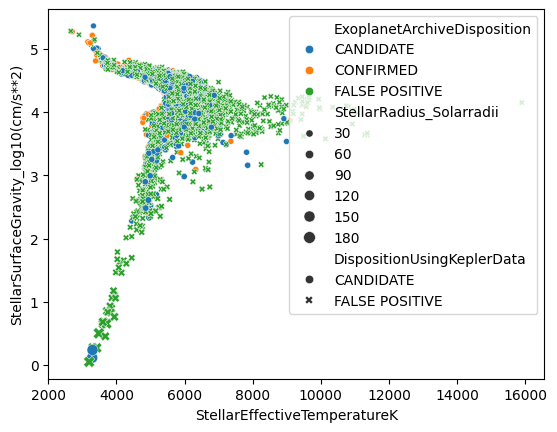

In [ ]:
# Disposición y Parámetros Estelares:
sns.scatterplot(
    data=df,
    x="StellarEffectiveTemperatureK",
    y="StellarSurfaceGravity_log10(cm/s**2)",
    hue="ExoplanetArchiveDisposition",
    style="DispositionUsingKeplerData",
    size="StellarRadius_Solarradii",
)

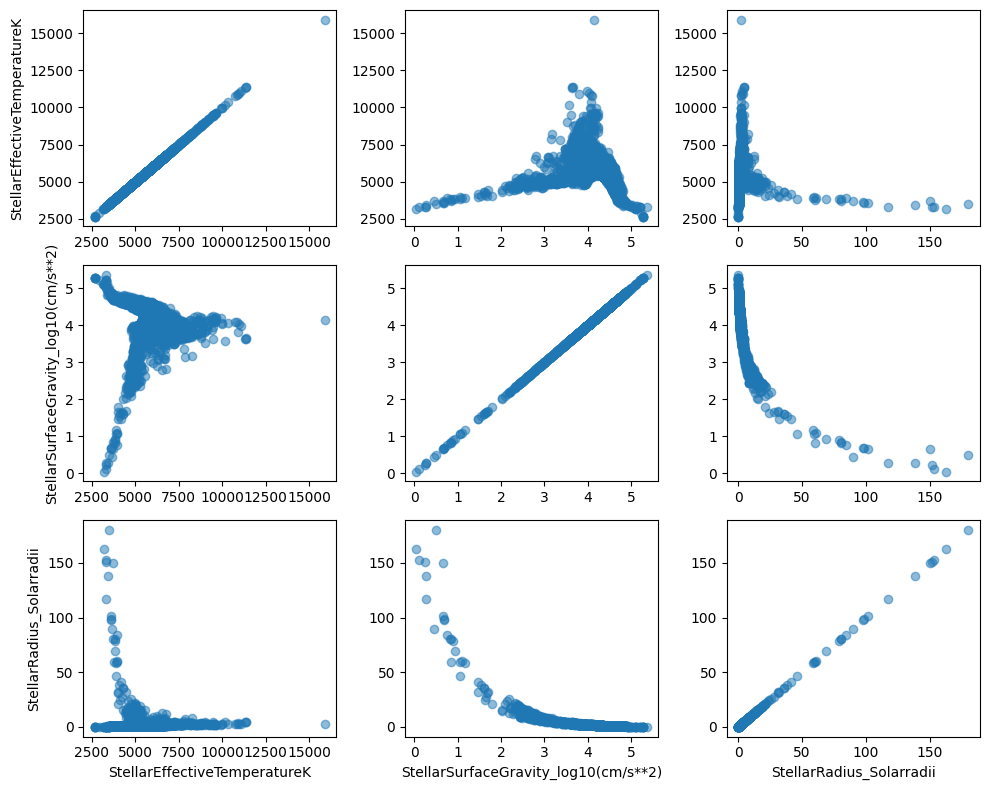

In [ ]:
vars = ['StellarEffectiveTemperatureK', 'StellarSurfaceGravity_log10(cm/s**2)', 'StellarRadius_Solarradii']
fig, axs = plt.subplots(len(vars), len(vars), figsize=(10, 8))
for i in range(len(vars)):
    for j in range(len(vars)):
        axs[i, j].scatter(df[vars[j]], df[vars[i]], alpha=0.5)
        if j == 0:
            axs[i, j].set_ylabel(vars[i])
        if i == len(vars) - 1:
            axs[i, j].set_xlabel(vars[j])
plt.tight_layout()
plt.show()


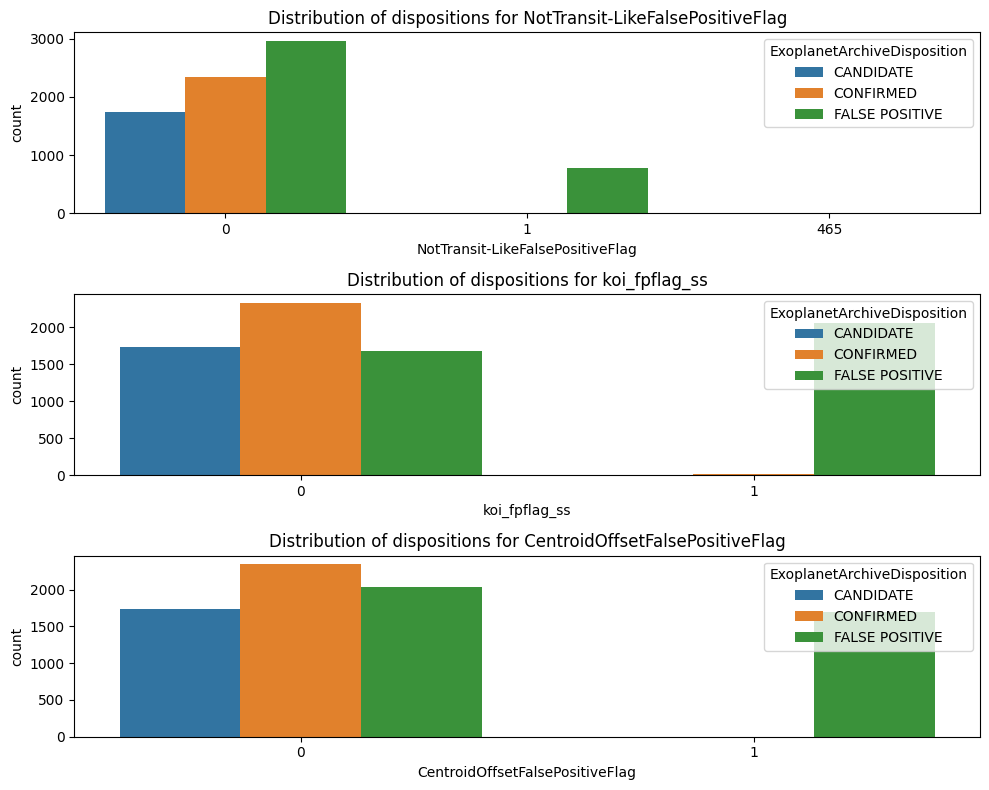

In [ ]:
# Transit Flags y Disposición:

flags = ['NotTransit-LikeFalsePositiveFlag', 'koi_fpflag_ss', 'CentroidOffsetFalsePositiveFlag']
fig, axs = plt.subplots(len(flags), 1, figsize=(10, 8))
for i, flag in enumerate(flags):
    sns.countplot(x=flag, hue='ExoplanetArchiveDisposition', data=df, ax=axs[i])
    axs[i].set_title(f'Distribution of dispositions for {flag}')

plt.tight_layout()
plt.show()


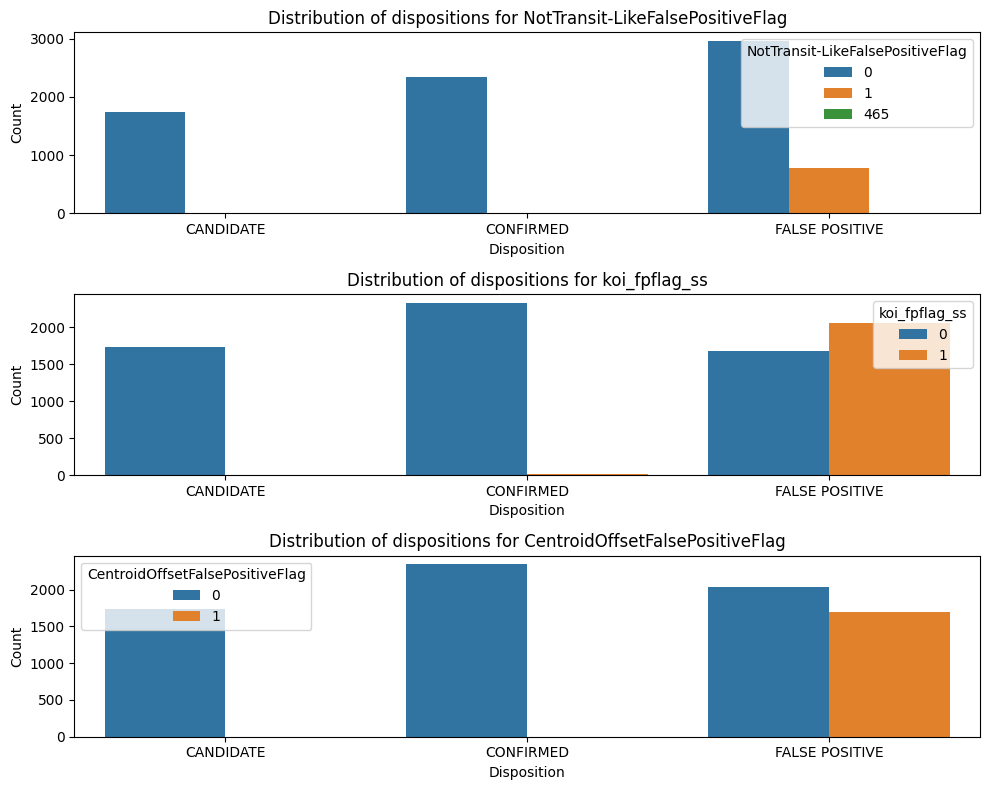

In [ ]:
# Histograma Disposición - Distribución:

fig, axs = plt.subplots(len(flags), 1, figsize=(10, 8))
for i, flag in enumerate(flags):
    sns.countplot(data=df, x='ExoplanetArchiveDisposition', hue=flag, ax=axs[i])
    axs[i].set_title(f'Distribution of dispositions for {flag}')
    axs[i].set_xlabel('Disposition')
    axs[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

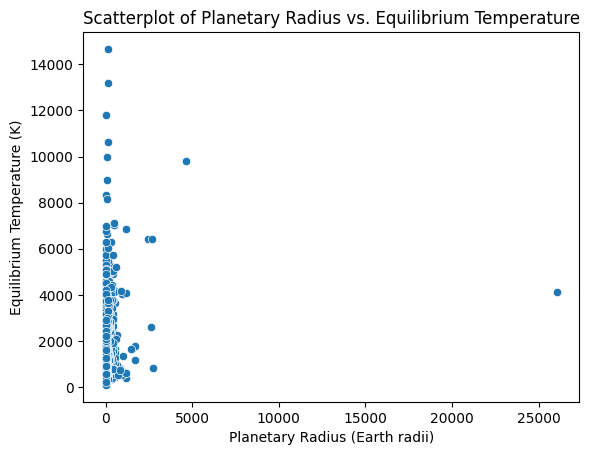

In [ ]:
# Radio Planetario y Temperatura de Equilibrio:

sns.scatterplot(
    data=df,
    x='PlanetaryRadius_Earthradii',
    y='EquilibriumTemperatureK'
)

plt.title('Scatterplot of Planetary Radius vs. Equilibrium Temperature')
plt.xlabel('Planetary Radius (Earth radii)')
plt.ylabel('Equilibrium Temperature (K)')

plt.show()

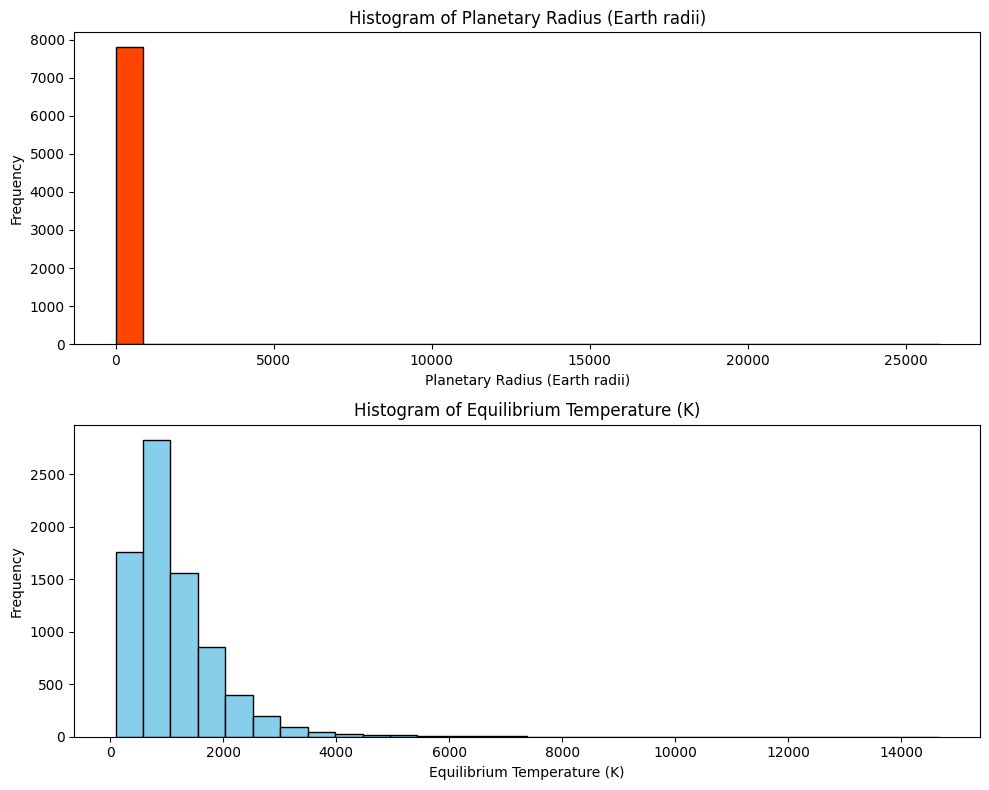

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].hist(df['PlanetaryRadius_Earthradii'], bins=30, color='orangered', edgecolor='black')
axs[0].set_title('Histogram of Planetary Radius (Earth radii)')
axs[0].set_xlabel('Planetary Radius (Earth radii)')
axs[0].set_ylabel('Frequency')

# Creación de histograma para EquilibriumTemperatureK
axs[1].hist(df['EquilibriumTemperatureK'], bins=30, color='skyblue', edgecolor='black')
axs[1].set_title('Histogram of Equilibrium Temperature (K)')
axs[1].set_xlabel('Equilibrium Temperature (K)')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


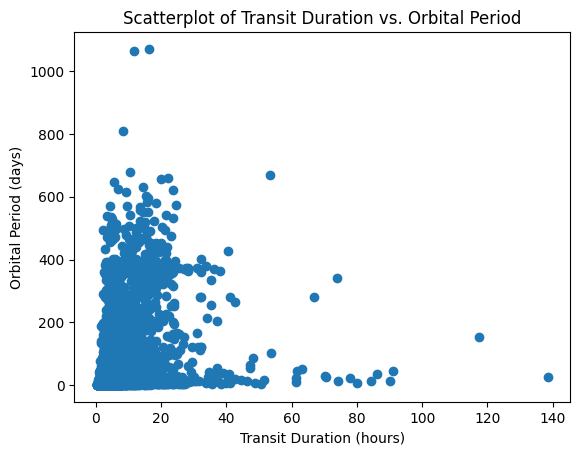

In [ ]:
# Duración de Tránsito y Período Orbital:

plt.scatter(
    df['TransitDuration_hrs'],
    df['OrbitalPeriod_days']
)

plt.title('Scatterplot of Transit Duration vs. Orbital Period')
plt.xlabel('Transit Duration (hours)')
plt.ylabel('Orbital Period (days)')

plt.show()

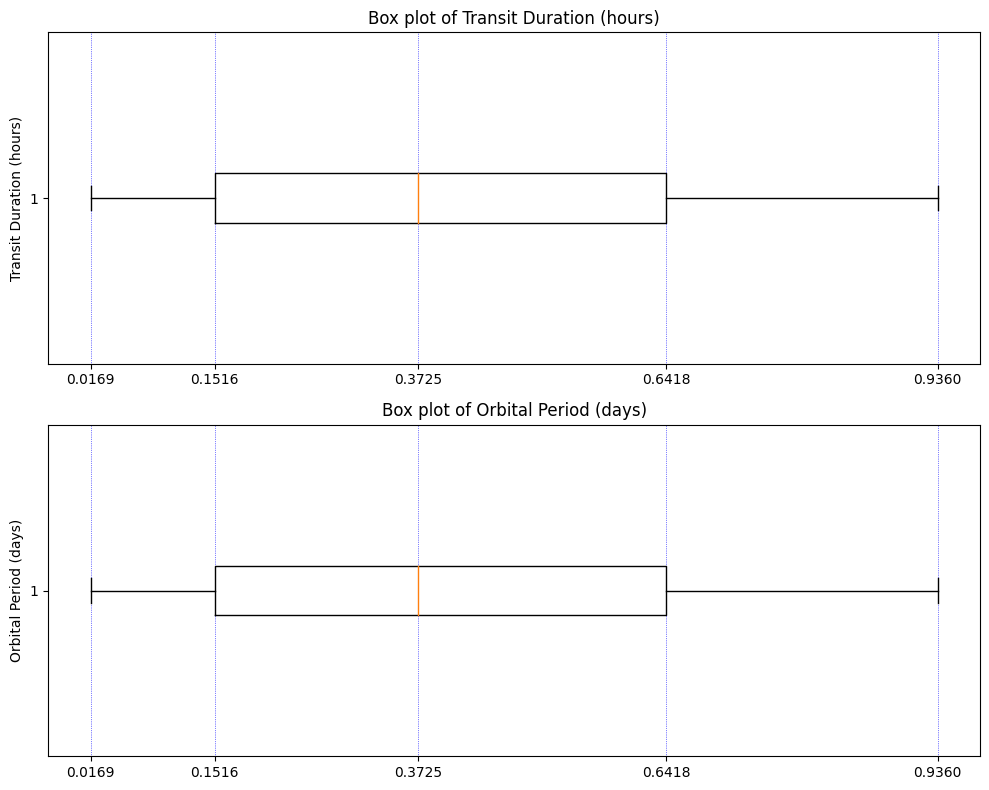

In [ ]:
# A continuación un análisis de boxplot por medidas medias en cuartiles para detectar outliers:
vel_arr = np.random.rand(50, 1)
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].boxplot(vel_arr, vert=False, manage_ticks=True)
axs[0].set_title('Box plot of Transit Duration (hours)')
axs[0].set_ylabel('Transit Duration (hours)')

axs[1].boxplot(vel_arr, vert=False, manage_ticks=True)
axs[1].set_title('Box plot of Orbital Period (days)')
axs[1].set_ylabel('Orbital Period (days)')

quantiles = np.quantile(vel_arr, np.array([0.00, 0.25, 0.50, 0.75, 1.00]))
for q in quantiles:
    axs[0].vlines(q, 0.5, 1.5, color='b', ls=':', lw=0.5, zorder=0)
    axs[1].vlines(q, 0.5, 1.5, color='b', ls=':', lw=0.5, zorder=0)

axs[0].set_xticks(quantiles)
axs[1].set_xticks(quantiles)

plt.tight_layout()
plt.show()


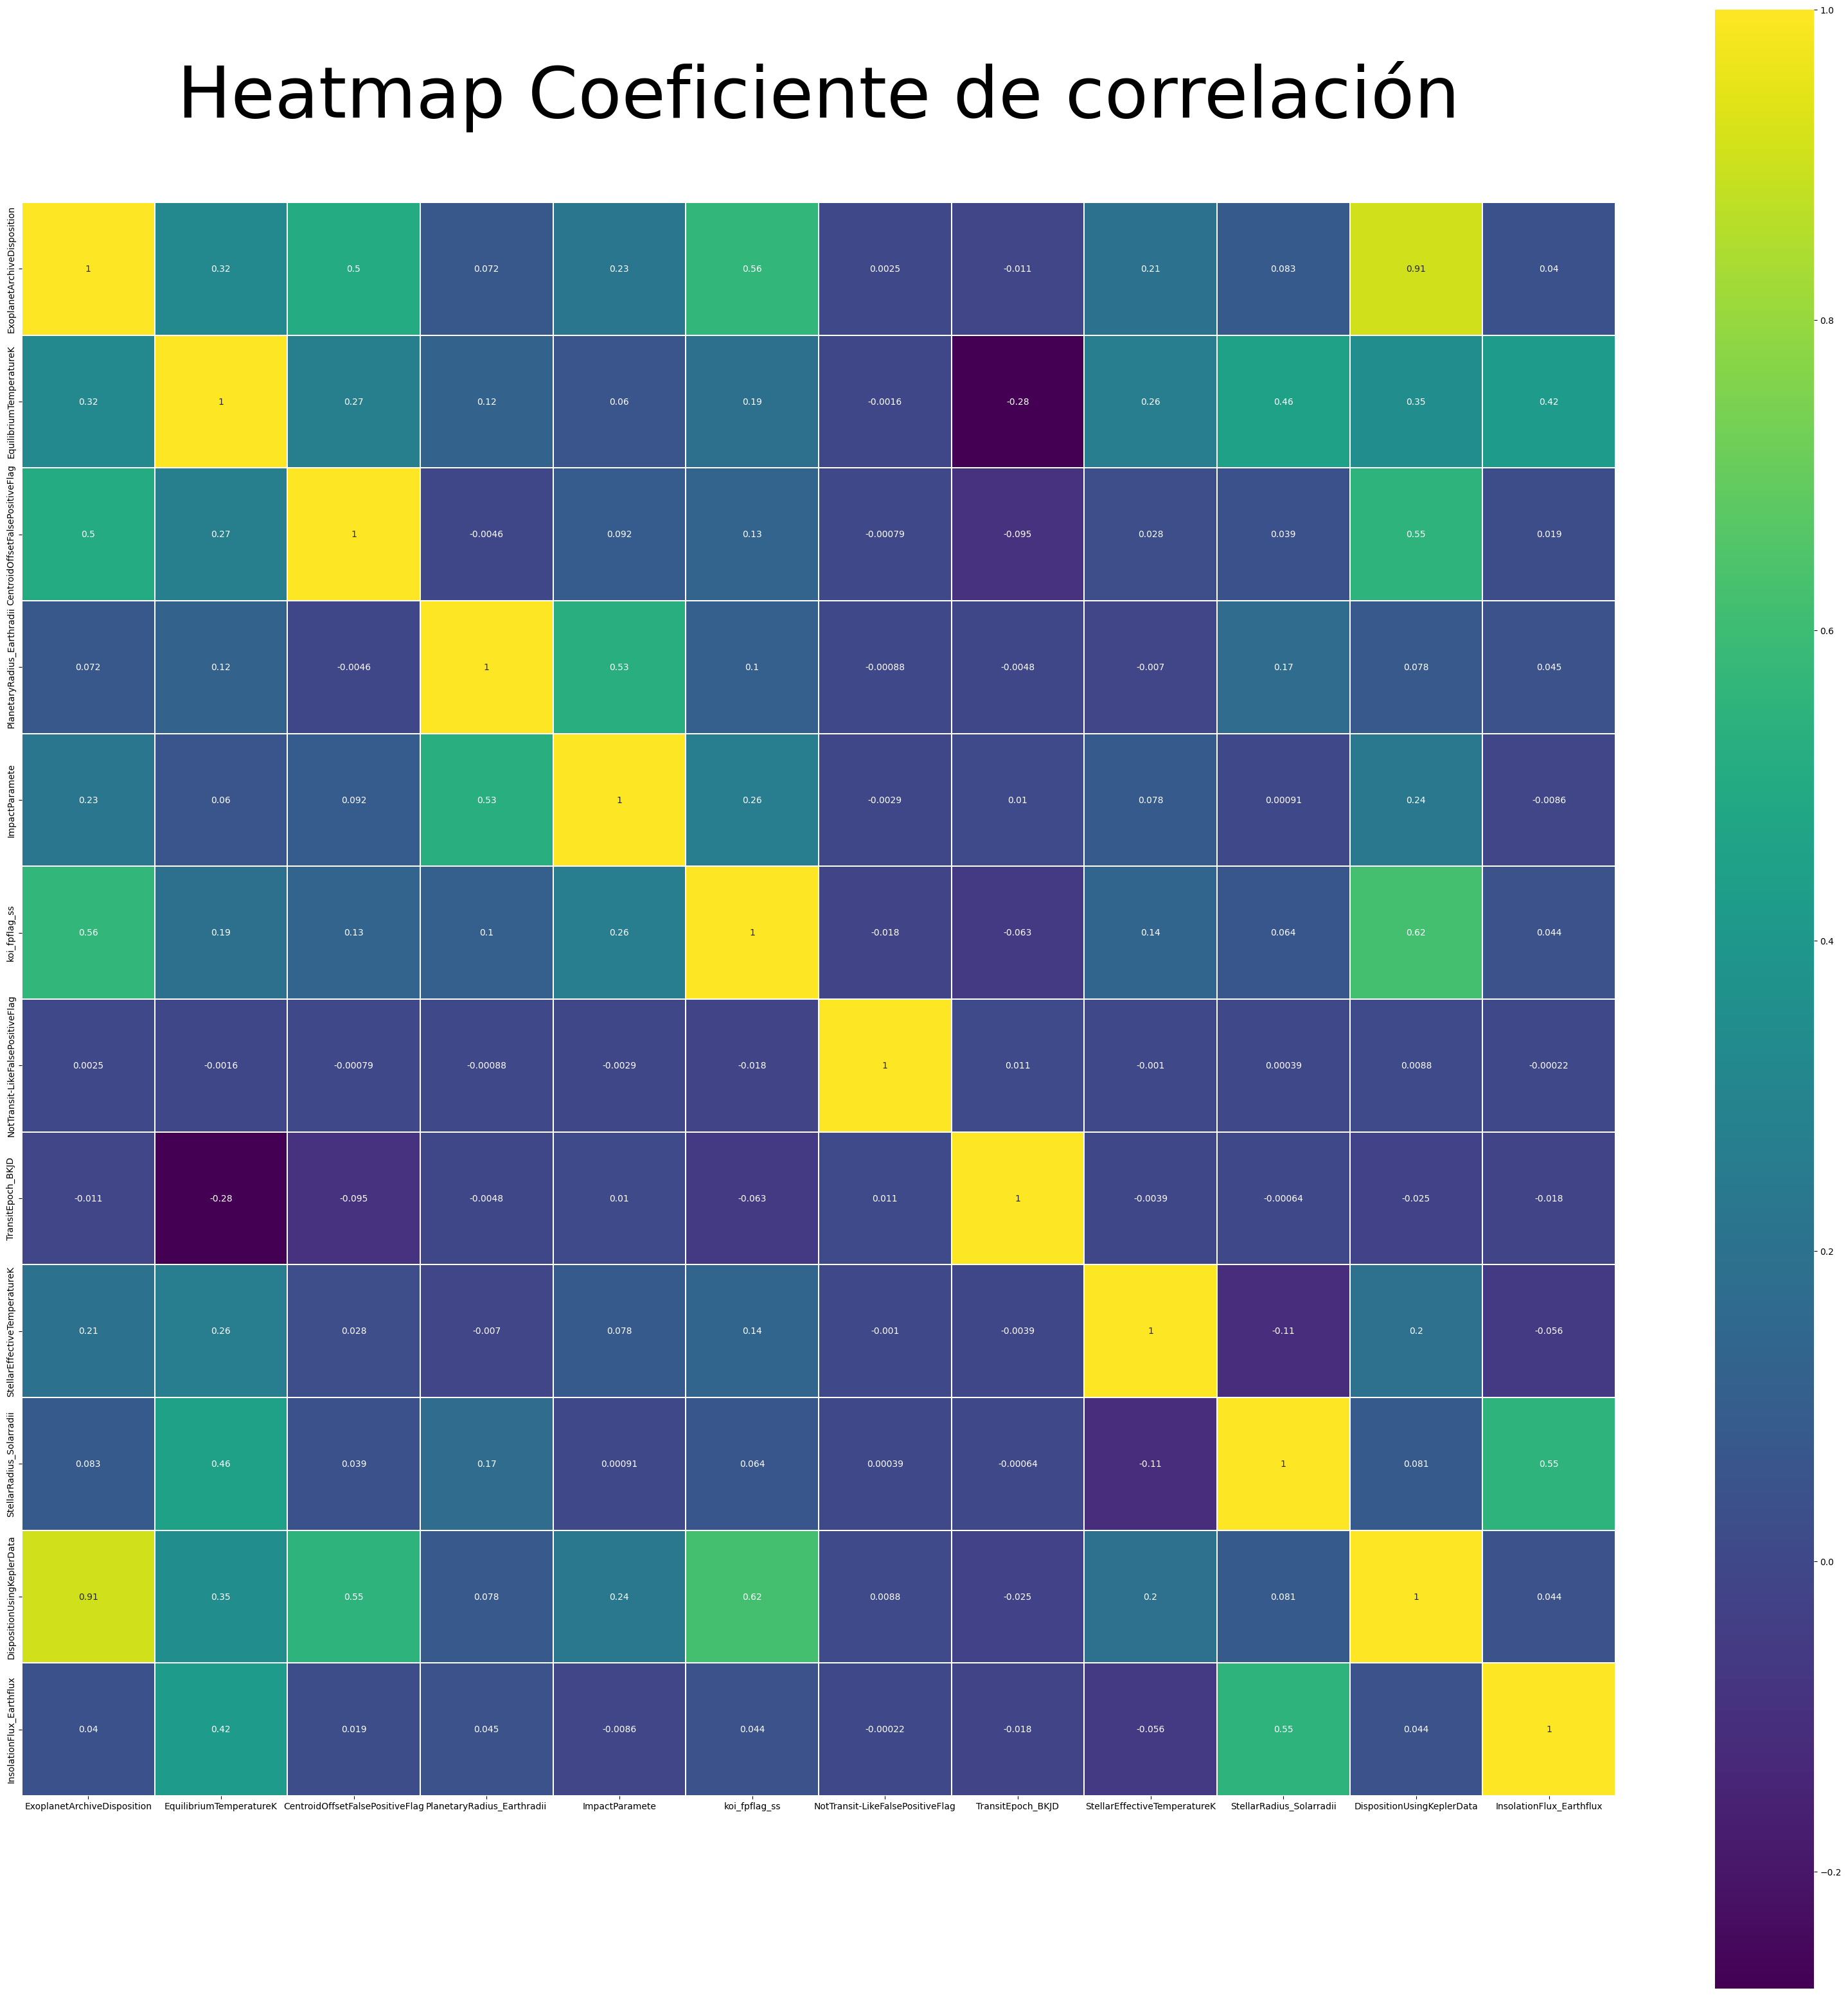

In [ ]:
mapacoef = plt.cm.viridis
plt.figure(figsize=(40,40))
plt.title('Heatmap Coeficiente de correlación', y=1.05, size=80)
sns.heatmap(exop.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=mapacoef, linecolor='white', annot=True)

plt.show()

Inicio ML - DS - modelos de aprendizaje

In [ ]:
# inicialmente, sabiendo que tenemos tres datos en forma de string que son indispensables para el análisis, crearé un
#  diccionario para poder utilizar dichos valores como integer (y que el modelo pueda procesarlo, de lo contrario no lo puede leer)
mapping_dict = {
    'CONFIRMED': 1,
    'CANDIDATE': 2,
    'FALSE POSITIVE': 3}

In [ ]:
# seguido creare un nuevo data frame para poder utilizar los datos transformados con el diccionario y las columnas que interesan para ML:
exop = pd.DataFrame()

exop['ExoplanetArchiveDisposition'] = df['ExoplanetArchiveDisposition'].map(mapping_dict)
exop['EquilibriumTemperatureK'] = df['EquilibriumTemperatureK']
exop['CentroidOffsetFalsePositiveFlag'] = df['CentroidOffsetFalsePositiveFlag']
exop['PlanetaryRadius_Earthradii'] = df['PlanetaryRadius_Earthradii']
exop['ImpactParamete'] = df['ImpactParamete']
exop['koi_fpflag_ss'] = df['koi_fpflag_ss']
exop['NotTransit-LikeFalsePositiveFlag'] = df['NotTransit-LikeFalsePositiveFlag']
exop['TransitEpoch_BKJD'] = df['TransitEpoch_BKJD']
exop['StellarEffectiveTemperatureK'] = df['StellarEffectiveTemperatureK']
exop['StellarRadius_Solarradii'] = df['StellarRadius_Solarradii']
exop['DispositionUsingKeplerData'] = df['DispositionUsingKeplerData'].map(mapping_dict)
exop['InsolationFlux_Earthflux'] = df['InsolationFlux_Earthflux']
exop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7818 entries, 0 to 9563
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   ExoplanetArchiveDisposition       7818 non-null   category
 1   EquilibriumTemperatureK           7818 non-null   float64 
 2   CentroidOffsetFalsePositiveFlag   7818 non-null   category
 3   PlanetaryRadius_Earthradii        7818 non-null   float64 
 4   ImpactParamete                    7818 non-null   float64 
 5   koi_fpflag_ss                     7818 non-null   category
 6   NotTransit-LikeFalsePositiveFlag  7818 non-null   category
 7   TransitEpoch_BKJD                 7818 non-null   float64 
 8   StellarEffectiveTemperatureK      7818 non-null   float64 
 9   StellarRadius_Solarradii          7818 non-null   float64 
 10  DispositionUsingKeplerData        7818 non-null   category
 11  InsolationFlux_Earthflux          7818 non-null   float64 
dt

In [ ]:
#variable independiente
X = exop[['ExoplanetArchiveDisposition','NotTransit-LikeFalsePositiveFlag','koi_fpflag_ss','CentroidOffsetFalsePositiveFlag','EquilibriumTemperatureK','InsolationFlux_Earthflux','PlanetaryRadius_Earthradii']]

#variable a predecir
y = exop[['DispositionUsingKeplerData']]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
rng = np.random.RandomState(60)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=rng,stratify=y)

In [ ]:
X_train.dtypes

ExoplanetArchiveDisposition         category
NotTransit-LikeFalsePositiveFlag    category
koi_fpflag_ss                       category
CentroidOffsetFalsePositiveFlag     category
EquilibriumTemperatureK              float64
InsolationFlux_Earthflux             float64
PlanetaryRadius_Earthradii           float64
dtype: object

In [ ]:
# Encode non-numeric columns using one-hot encoding
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Impute missing values in numeric columns
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_test_imputed = imputer.transform(X_test_encoded)

In [ ]:
# Impute missing values in numeric columns ONLY
imputer = SimpleImputer(strategy='mean')

# Select only numeric columns
numeric_columns = X_train.select_dtypes(include=np.number).columns
X_train_numeric = X_train[numeric_columns]
X_test_numeric = X_test[numeric_columns]

X_train_imputed = imputer.fit_transform(X_train_numeric)
X_test_imputed = imputer.transform(X_test_numeric)

# Convert the imputed arrays back to DataFrames (optional, but might be helpful)
X_train_imputed = pd.DataFrame(X_train_imputed, columns=numeric_columns, index=X_train_numeric.index)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=numeric_columns, index=X_test_numeric.index)

In [ ]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [ ]:
# Import the LabelEncoder class
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the LabelEncoder object on the categorical variables in X_train
X_train = X_train.apply(le.fit_transform)

# Fit the DecisionTreeClassifier on the transformed X_train and y_train data
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the LabelEncoder object on the categorical variables in X_test
X_test = X_test.apply(le.fit_transform)
y_pred = clf.predict(X_test)

In [ ]:
# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Imprimir el informe de clasificación
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9961636828644501
Classification Report:
              precision    recall  f1-score   support

           2       1.00      1.00      1.00      1223
           3       1.00      1.00      1.00      1123

    accuracy                           1.00      2346
   macro avg       1.00      1.00      1.00      2346
weighted avg       1.00      1.00      1.00      2346



In [ ]:
 from sklearn.metrics import confusion_matrix

In [ ]:
preds = clf.predict(X_test)
preds_train = clf.predict(X_train)
cm = confusion_matrix(y_test, preds)

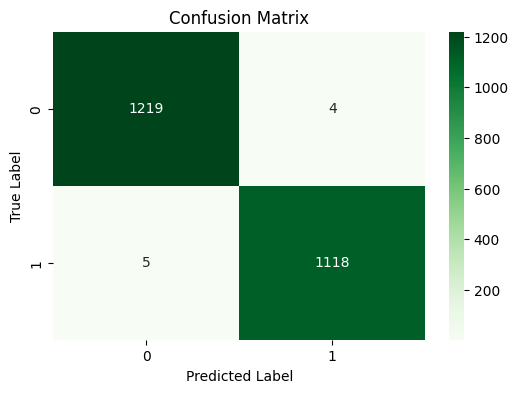

In [ ]:
# usando heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
y.value_counts()

DispositionUsingKeplerData
2                             4075
3                             3743
Name: count, dtype: int64

In [ ]:
#los datos en las clases son incongruentes, no podemos hacer prueba de accuracy
y.value_counts(normalize=True).round(2)*100

DispositionUsingKeplerData
2                             52.0
3                             48.0
Name: proportion, dtype: float64

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled,y_train.values.ravel())
accuracy = rfc.score(X_test_scaled, y_test)
print('accuracy =', round(accuracy * 100, 2), '%')

accuracy = 99.91 %


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1 = f1_score(y_test, y_pred, average='micro')

print("F1-score:", f1)

F1-score: 0.9961636828644501


In [ ]:
print('accuracy =', round(accuracy * 100, 2), '%')

accuracy = 99.79 %


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train.values.ravel())
y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print('accuracy =', round(accuracy * 100, 2), '%')

accuracy = 99.79 %


In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train.values.ravel())
accuracy = logreg.score(X_test_scaled, y_test)

In [ ]:
print('Accuracy =', round(accuracy * 100, 2), '%')

Accuracy = 99.79 %


F1 - K means y Regresión lógica: los modelos tienen un 99.79% de precisión

RandomForestClassifier es el algoritmo que devuelve el mayor porcentaje de precisión 99,91%